In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

In [2]:

pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_excel('amazon_final.xlsx')
gdf=pd.read_excel('amazon_final.xlsx')
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
dataset_train = train_data
training_set = dataset_train.iloc[:, [1,2,3,4,5,7]].values

In [4]:
len(training_set)

1007

In [5]:
# df.isnull().values.any()
# df = df.dropna()
# print(df)

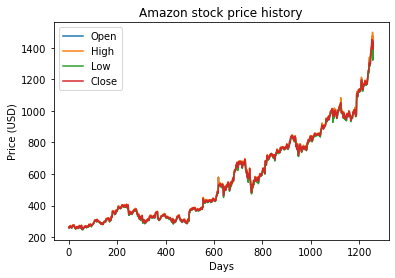

In [6]:
plt.figure()
plt.plot(df["open"])
plt.plot(df["high"])
plt.plot(df["low"])
plt.plot(df["close"])
plt.title('Amazon stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

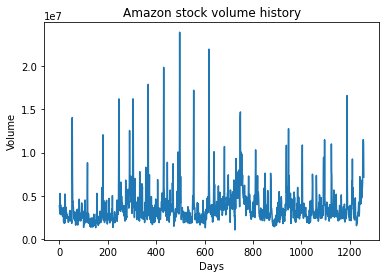

In [7]:
plt.figure()
plt.plot(df["volume"])
plt.title('Amazon stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [8]:

# gdf["date"] = pd.to_datetime(gdf["date"])

# gdf["year"]= gdf["date"].dt.year
# plt.figure(figsize = (15,10))
# plt.plot(gdf["close"])
# plt.xlabel("year")
# plt.ylabel("close")
# # plt.legend(loc='best')
# plt.show()

# gdf


0          261.950
1          519.160
2          777.860
3         1047.330
4         1316.570
           ...    
1254    720612.401
1255    722042.351
1256    723432.351
1257    724875.191
1258    726291.971
Name: close, Length: 1259, dtype: float64
            date     open     high       low    close    volume  Name  \
0     2013-02-08   261.40   265.25   260.555   261.95   3879078  AMZN   
1     2013-02-11   263.20   263.25   256.600   257.21   3403403  AMZN   
2     2013-02-12   259.19   260.16   257.000   258.70   2938660  AMZN   
3     2013-02-13   261.53   269.96   260.300   269.47   5292996  AMZN   
4     2013-02-14   267.37   270.65   265.400   269.24   3462780  AMZN   
...          ...      ...      ...       ...      ...       ...   ...   
1254  2018-02-01  1445.00  1459.88  1385.140  1390.00   9113808  AMZN   
1255  2018-02-02  1477.39  1498.00  1414.000  1429.95  11125722  AMZN   
1256  2018-02-05  1402.62  1458.98  1320.720  1390.00  11494985  AMZN   
1257  2018-02-06  1

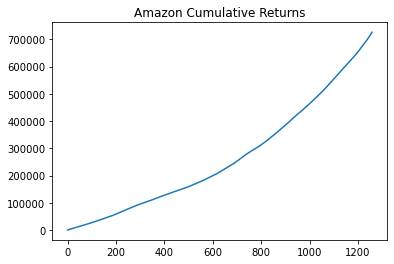

In [9]:
dr = df['close'].cumsum()
print(dr)
dr.plot()
plt.title('Amazon Cumulative Returns')
print(df)

Text(0.5, 1.0, 'Amazon Autocorrelation plot')

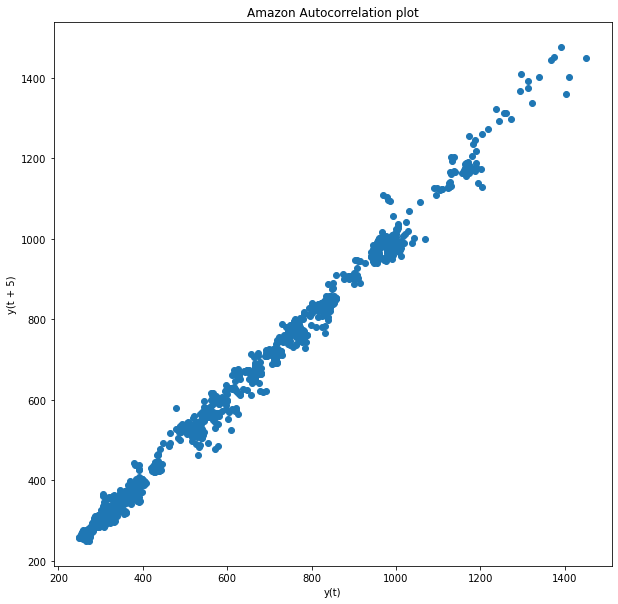

In [10]:
plt.figure(figsize=(10,10))
lag_plot(df['open'], lag=5)
plt.title('Amazon Autocorrelation plot')

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set = sc.fit_transform(training_set)

In [12]:
training_set_scaled = training_set
print(training_set_scaled)

[[0.02087627 0.02073097 0.02488863 0.02301511 0.12239586 0.9779489 ]
 [0.0238921  0.01736555 0.01823989 0.01506383 0.10149909 0.500025  ]
 [0.01717349 0.01216598 0.01891233 0.01756328 0.08108258 0.500025  ]
 ...
 [0.93453967 0.9513529  0.93847188 0.94269706 0.42945852 0.500025  ]
 [0.93970009 0.93859797 0.93679079 0.9384027  0.12319641 0.500025  ]
 [0.93887912 0.9477519  0.94435572 0.94655528 0.10425303 0.87109355]]


In [13]:
X_train = []
y_train = []
for i in range(60, 1007):
    X_train.append(training_set_scaled[i-60:i, :])
    y_train.append(training_set_scaled[i, 3])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.array(X_train)
print(X_train.shape)

(947, 60, 6)


In [55]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import RMSprop, Adam
import tensorflow as tf

In [56]:
def CreateModel():
    regressor = Sequential()

    regressor.add(LSTM(units = 100, dropout=0.0, kernel_initializer='random_uniform', recurrent_dropout=0.0, return_sequences = True, input_shape = ( 60, 6)))
    regressor.add(Dropout(0.4))

    # regressor.add(LSTM(units = 50, return_sequences = True))
    # regressor.add(Dropout(0.2))

    # regressor.add(LSTM(units = 50, return_sequences = True))
    # regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 60, dropout=0.0))
    regressor.add(Dropout(0.4))

    regressor.add(Dense(units = 20, activation='gelu'))
    regressor.add(Dense(units = 20, activation='gelu'))

    opt = Adam(lr=0.0001)

    regressor.compile(optimizer = opt, loss = 'mean_squared_error')
    return regressor
# regressor=CreateModel()

regressor = load_model('saved_model/my_model')
# regressor.fit(X_train, y_train, epochs = 200, batch_size = 20)


In [46]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 20)

regressor.save('saved_model/my_model')

Epoch 1/10
48/48 [==============================] - 3s 52ms/step - loss: 0.0140
Epoch 2/10
48/48 [==============================] - 2s 43ms/step - loss: 0.0139
Epoch 3/10
48/48 [==============================] - 2s 42ms/step - loss: 0.0140
Epoch 4/10
48/48 [==============================] - 2s 50ms/step - loss: 0.0140
Epoch 5/10
48/48 [==============================] - 3s 53ms/step - loss: 0.0141
Epoch 6/10
48/48 [==============================] - 2s 41ms/step - loss: 0.0139
Epoch 7/10
48/48 [==============================] - 2s 33ms/step - loss: 0.0137
Epoch 8/10
48/48 [==============================] - 1s 27ms/step - loss: 0.0137
Epoch 9/10
48/48 [==============================] - 1s 27ms/step - loss: 0.0138
Epoch 10/10
48/48 [==============================] - 1s 27ms/step - loss: 0.0138


INFO:tensorflow:Assets written to: saved_model/my_model\assets


INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [17]:
#BEST!! AMAZON # RMSE 36 220 epochs closing value
# regressor = Sequential()

# regressor.add(LSTM(units = 100, dropout=0.0, kernel_initializer='random_uniform', recurrent_dropout=0.0, return_sequences = True, input_shape = ( 60, 6)))
# regressor.add(Dropout(0.4))

# # regressor.add(LSTM(units = 50, return_sequences = True))
# # regressor.add(Dropout(0.2))

# # regressor.add(LSTM(units = 50, return_sequences = True))
# # regressor.add(Dropout(0.2))
# regressor.add(LSTM(units = 60, dropout=0.0))
# regressor.add(Dropout(0.4))

# regressor.add(Dense(units = 20, activation='gelu'))
# regressor.add(Dense(units = 20, activation='gelu'))

# opt = Adam(lr=0.0001)

# regressor.compile(optimizer = opt, loss = 'mean_squared_error')

# regressor.fit(X_train, y_train, epochs = 220, batch_size = 20)

In [47]:
dataset_test = test_data
real_stock_price = dataset_test.iloc[:, 4].values


In [57]:
dataset_total = pd.concat((dataset_train[['open', 'high','low','close','volume','Sentiment']], dataset_test[['open', 'high','low','close','volume','Sentiment']]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# print(inputs[0])
# inputs = inputs.reshape(-1,1)
# print(inputs[0])
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, :])
X_test = np.array(X_test)
# X_test = np.array(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
buffered_predicted_stock_price = np.array([[0,0,0,i[0],0,0] for i in predicted_stock_price])  
predicted_stock_price = sc.inverse_transform(buffered_predicted_stock_price)
predicted_stock_price = predicted_stock_price[:,3]
                                    

    

In [58]:
def return_rmse(test,predicted):
    # START_CODE_HERE
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    # END_CODE_HERE

In [59]:
return_rmse(real_stock_price,predicted_stock_price)

The root mean squared error is 87.384162653201.


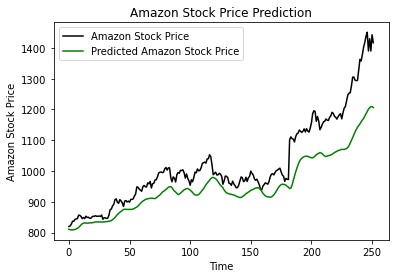

In [60]:
plt.plot(real_stock_price, color = 'black', label = 'Amazon Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

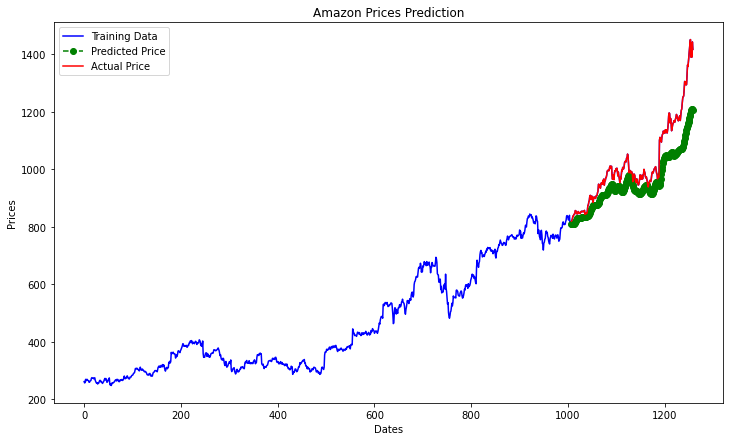

In [53]:
plt.figure(figsize=(12,7))
plt.plot(df['close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predicted_stock_price, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['close'], color='red', label='Actual Price')
plt.title('Amazon Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
# plt.xticks(np.arange(0,1260, 60), df['date'][0:1260:60])
plt.legend()

In [44]:
# Define a simple sequential model
def create_model():
  model = Sequential([
   Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(10)
  ])

  model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.metrics.SparseCategoricalAccuracy()])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

NameError: name 'keras' is not defined

In [38]:
# Create and train a new model instance.
model = create_model()
model.fit(train_images, train_labels, epochs=5)

# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')

NameError: name 'create_model' is not defined